In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("final.csv", delimiter=",",skiprows=1)
# split into input (X) and output (Y) variables
X = dataset[0:,0:14]
Y = to_categorical(dataset[0:,14], num_classes=4)

In [3]:
# create model
model = Sequential()
model.add(Dense(14, input_dim=14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
history=model.fit(X, Y, epochs=60, batch_size=5, verbose=1)

Epoch 1/60
170/170 [==============================] - 0s 3ms/step - loss: 1.3820 - acc: 0.3529
Epoch 2/60
170/170 [==============================] - 0s 303us/step - loss: 1.3677 - acc: 0.3353
Epoch 3/60
170/170 [==============================] - 0s 280us/step - loss: 1.3551 - acc: 0.2941
Epoch 4/60
170/170 [==============================] - 0s 299us/step - loss: 1.3339 - acc: 0.2824
Epoch 5/60
170/170 [==============================] - 0s 277us/step - loss: 1.2882 - acc: 0.3294
Epoch 6/60
170/170 [==============================] - 0s 340us/step - loss: 1.2098 - acc: 0.3647
Epoch 7/60
170/170 [==============================] - 0s 285us/step - loss: 1.1271 - acc: 0.4588
Epoch 8/60
170/170 [==============================] - 0s 283us/step - loss: 1.0408 - acc: 0.4941
Epoch 9/60
170/170 [==============================] - 0s 273us/step - loss: 0.9517 - acc: 0.5059
Epoch 10/60
170/170 [==============================] - 0s 272us/step - loss: 0.8585 - acc: 0.5059
Epoch 11/60
170/170 [==========

In [10]:

k = 0
ans = [0, 0, 0, 0]
h = 1
while k < 169:
    A = []
    Xnew1 = numpy.array([X[k]])
    Xnew2 = numpy.array([X[k+1]])
    Xnew3 = numpy.array([X[k+2]])
    Xnew4 = numpy.array([X[k+3]])
    Xnew5 = numpy.array([X[k+4]])
    ynew1 = model.predict_classes(Xnew1)
    A.append(ynew1[0])
    ynew2 = model.predict_classes(Xnew2)
    A.append(ynew2[0])
    ynew3 = model.predict_classes(Xnew3)
    A.append(ynew3[0])
    ynew4 = model.predict_classes(Xnew4)
    A.append(ynew4[0])
    ynew5 = model.predict_classes(Xnew5)
    A.append(ynew5[0])
    #print("Prediction : %s %s %s %s %s" % (ynew1[0],ynew2[0] ,ynew3[0] ,ynew4[0] ,ynew5[0]))

    counter = 0
    num = A[0] 

    for i in A: 
        curr_frequency = A.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i
    print("Prediction for user %s is : %s" % (h,num))
    ans[num]+= 1
    h = h + 1
    k = k + 5

Prediction for user 1 is : 3
Prediction for user 2 is : 1
Prediction for user 3 is : 1
Prediction for user 4 is : 2
Prediction for user 5 is : 2
Prediction for user 6 is : 1
Prediction for user 7 is : 1
Prediction for user 8 is : 1
Prediction for user 9 is : 1
Prediction for user 10 is : 0
Prediction for user 11 is : 2
Prediction for user 12 is : 0
Prediction for user 13 is : 3
Prediction for user 14 is : 3
Prediction for user 15 is : 0
Prediction for user 16 is : 1
Prediction for user 17 is : 2
Prediction for user 18 is : 3
Prediction for user 19 is : 0
Prediction for user 20 is : 0
Prediction for user 21 is : 3
Prediction for user 22 is : 1
Prediction for user 23 is : 3
Prediction for user 24 is : 3
Prediction for user 25 is : 3
Prediction for user 26 is : 0
Prediction for user 27 is : 3
Prediction for user 28 is : 2
Prediction for user 29 is : 0
Prediction for user 30 is : 2
Prediction for user 31 is : 3
Prediction for user 32 is : 0
Prediction for user 33 is : 3
Prediction for user

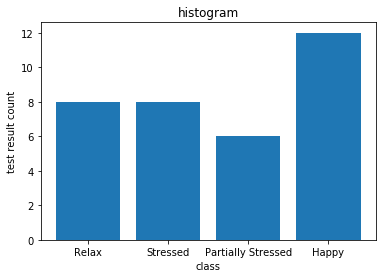

In [13]:
import matplotlib.pyplot as plt
clas = ['Relax','Stressed','Partially Stressed','Happy']
plt.bar(clas, ans)
plt.title('histogram')
plt.xlabel('class')
plt.ylabel('test result count')
plt.show('histogram.png')

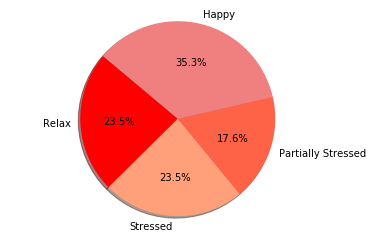

In [11]:
labels =  ['Relax','Stressed','Partially Stressed','Happy']
colors = ['red','lightsalmon', 'tomato', 'lightcoral']
# Plot
plt.pie(ans, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show('a1.png')